In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np

In [2]:
def viz_nf(filename='contam_fractions.npz'):
    data = np.load(filename)
    midnight= data['result_mjds'][:, 4]
    mjds = (data['result_mjds'].T - data['result_mjds'][:,4])*24.
    night = data['result_fractions'][:,-1]
    night = np.tile(night,9).reshape(mjds.shape)
    plt.scatter(mjds.ravel(), night.ravel(), c=data['result_fractions'][:,:-1].T.ravel(), alpha=1)
    cb = plt.colorbar()
    plt.xlabel('Time from midnight (hours)')
    plt.ylabel('Night (days)')
    cb.set_label('Fraction of fields with satellites in 30s')
    plt.ylim([0,366])

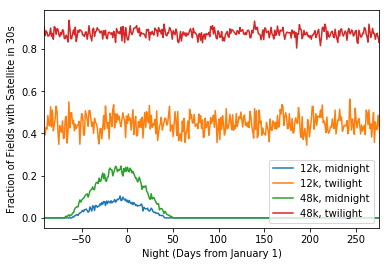

In [23]:
#def viz_nf2(filename='contam_fractions.npz'):
filename='contam_fractions.npz'
data = np.load(filename)
midnight= data['result_mjds'][:, 4]
mjds = (data['result_mjds'].T - data['result_mjds'][:,4])*24.
night = data['result_fractions'][:,-1]

# jan 1, 2023
jan_1_offset = -data['result_mjds'][:, 4][0] + 59945 

mjds = mjds[:,4]
frac = data['result_fractions'][:,4]

plt.plot(night - jan_1_offset, frac, label='12k, midnight')
plt.xlim([0,366])
plt.xlabel('Night (days)')
plt.ylabel('Fraction of Fields with Satellite in 30s')
plt.title('Midnight')


midnight= data['result_mjds'][:, 4]
mjds = (data['result_mjds'].T - data['result_mjds'][:,4])*24.
night = data['result_fractions'][:,-1]

mjds = mjds[:,4]
frac = data['result_fractions'][:,0]
good = np.where(frac > 0)
plt.plot(night[good] - jan_1_offset, frac[good], label='12k, twilight')



#def viz_nf2(filename='contam_fractions.npz'):
filename='contam_fractions_scalesuper.npz'
data = np.load(filename)
midnight= data['result_mjds'][:, 4]
mjds = (data['result_mjds'].T - data['result_mjds'][:,4])*24.
night = data['result_fractions'][:,-1]

mjds = mjds[:,4]
frac = data['result_fractions'][:,4]

plt.plot(night - jan_1_offset, frac, label= '48k, midnight')
plt.xlim([-jan_1_offset,366-jan_1_offset])
plt.xlabel('Night (Days from January 1)')
plt.ylabel('Fraction of Fields with Satellite in 30s')
plt.title('')



frac = data['result_fractions'][:,0]
# clean up what I think is an ephem bug
good = np.where(frac > 0)[0]
plt.plot(night[good] - jan_1_offset, frac[good], label='48k, twilight')


plt.legend(loc="lower right")
plt.savefig('frac_with_sats.pdf')

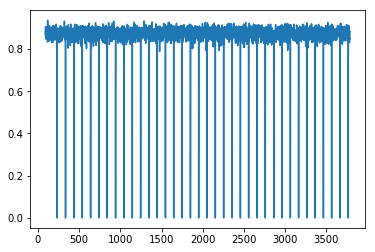

In [17]:
plt.plot(night - jan_1_offset, frac, label='48k, twilight')


In [6]:
data['result_fractions']


array([[  9.02472527e-01,   8.66071429e-01,   8.24175824e-01, ...,
          8.79807692e-01,   9.22390110e-01,   0.00000000e+00],
       [  8.64010989e-01,   8.64010989e-01,   8.19368132e-01, ...,
          8.53021978e-01,   9.16208791e-01,   1.00000000e+00],
       [  8.85302198e-01,   8.64697802e-01,   7.92582418e-01, ...,
          8.92857143e-01,   8.97664835e-01,   2.00000000e+00],
       ..., 
       [  8.45467033e-01,   8.78434066e-01,   8.42032967e-01, ...,
          8.85302198e-01,   8.69505495e-01,   3.69000000e+03],
       [  8.46840659e-01,   8.55769231e-01,   8.27609890e-01, ...,
          8.80494505e-01,   8.77747253e-01,   3.69100000e+03],
       [  8.81868132e-01,   8.54395604e-01,   8.31043956e-01, ...,
          8.57142857e-01,   8.88049451e-01,   3.69200000e+03]])

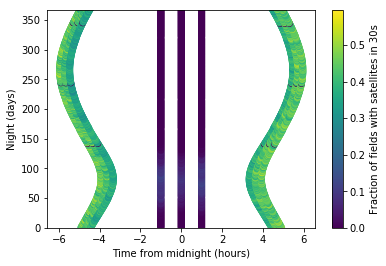

In [11]:
viz_nf()

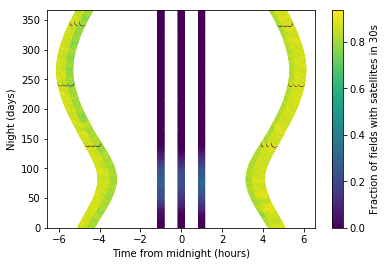

In [12]:
viz_nf('contam_fractions_scalesuper.npz')